In [1]:
import pandas as pd

Ranking of the teams most frequently caught offside against Barcelona

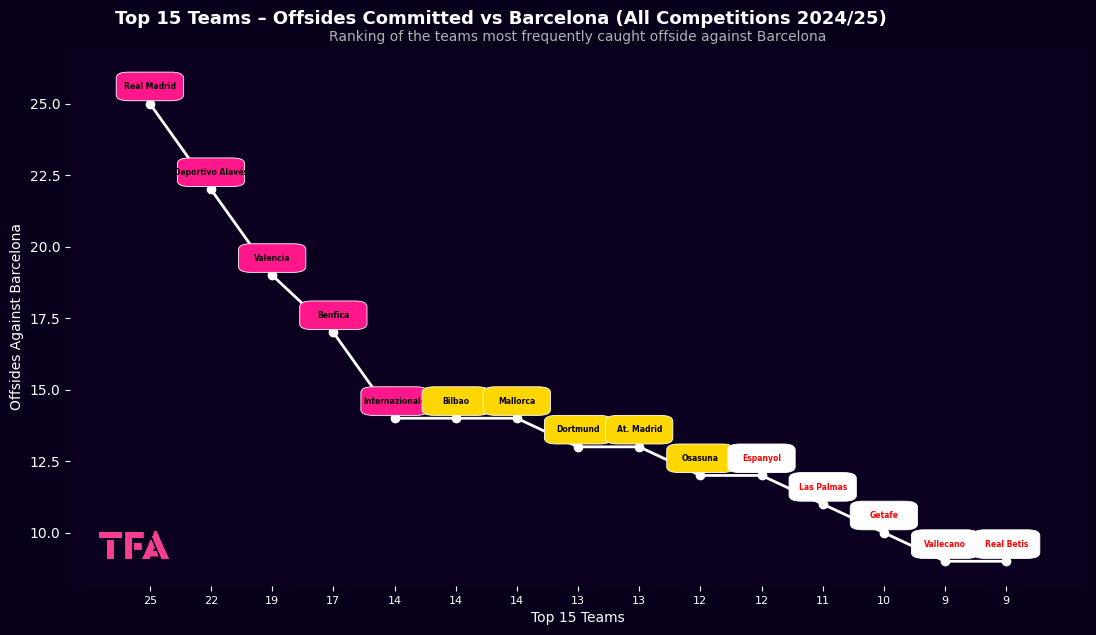

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

data = {
    "Team": [
        "Bilbao", "Villarreal", "Espanyol", "Real Madrid", "Internazionale",
        "Real Valladolid", "Internazionale", "Real Madrid", "Mallorca", "Celta de Vigo",
        "Dortmund", "Leganés", "Dortmund", "Real Betis", "At. Madrid",
        "Girona", "Osasuna", "At. Madrid", "Benfica", "Benfica", "Real Sociedad",
        "At. Madrid", "Las Palmas", "Vallecano", "Sevilla", "Valencia",
        "Deportivo Alavés", "Atalanta", "Valencia", "Benfica", "Getafe", "Real Betis",
        "Real Madrid", "Bilbao", "Barbastro", "At. Madrid", "Dortmund",
        "Real Betis", "Mallorca", "Las Palmas", "Brest", "Celta de Vigo", "Real Sociedad",
        "Crvena Zvezda", "Espanyol", "Real Madrid", "Bayern München", "Sevilla",
        "Deportivo Alavés", "Young Boys", "Osasuna", "Getafe", "Villarreal", "Monaco",
        "Girona", "Real Valladolid", "Vallecano", "Bilbao", "Valencia"
    ],
    "Offsides": [
        5, 1, 5, 5, 9, 3, 5, 7, 3, 0, 4, 4, 4, 2, 4, 2, 4, 2, 9, 3, 3, 3, 6, 5, 3, 9, 11, 6, 4, 5,
        3, 7, 1, 5, 4, 4, 5, 0, 11, 5, 6, 3, 3, 9, 7, 12, 4, 3, 11, 6, 8, 7, 7, 7, 6, 5, 4, 4, 6
    ]
}

df = pd.DataFrame(data)
df = df.groupby("Team", as_index=False)["Offsides"].sum()
df = df.sort_values(by="Offsides", ascending=False).head(15).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0B0020")

ax.plot(df.index, df["Offsides"], color="white", linewidth=2, marker='o', markersize=6)

for i, row in df.iterrows():
    if i < 5:
        color = "#FF178B" 
    elif i < 10:
        color = "#FFD700"
    else:
        color = "#FFFFFF"
    
    ax.add_patch(patches.FancyBboxPatch(
        (i - 0.35, row["Offsides"] + 0.3),
        0.7, 0.6,
        boxstyle="round,pad=0.2",
        linewidth=0.6,
        edgecolor="white",
        facecolor=color,
        zorder=3
    ))
    ax.text(i, row["Offsides"] + 0.6, row["Team"], ha='center', va='center',
            fontsize=5.5, color="black" if color != "#FFFFFF" else "red", fontweight='bold')

ax.set_xticks(range(len(df)))
ax.set_xticklabels(df["Offsides"], fontsize=8, color="white")
ax.set_ylabel("Offsides Against Barcelona", color="white", fontsize=10)
ax.set_xlabel("Top 15 Teams", color="white", fontsize=10)
ax.tick_params(colors="white")
ax.spines[:].set_visible(False)

plt.suptitle("Top 15 Teams – Offsides Committed vs Barcelona (All Competitions 2024/25)",
             color="white", fontsize=13, weight='bold', y=0.96)
plt.title("Ranking of the teams most frequently caught offside against Barcelona",
          color="#B0B0B0", fontsize=10, pad=5)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.165)
    ab = AnnotationBbox(imagebox, (0.018, 0.16), frameon=False, xycoords='axes fraction', box_alignment=(0, 1))
    ax.add_artist(ab)

plt.tight_layout()
plt.show()

Pressing Efficiency & Defensive Line Sustainability – Key defensive metrics per match

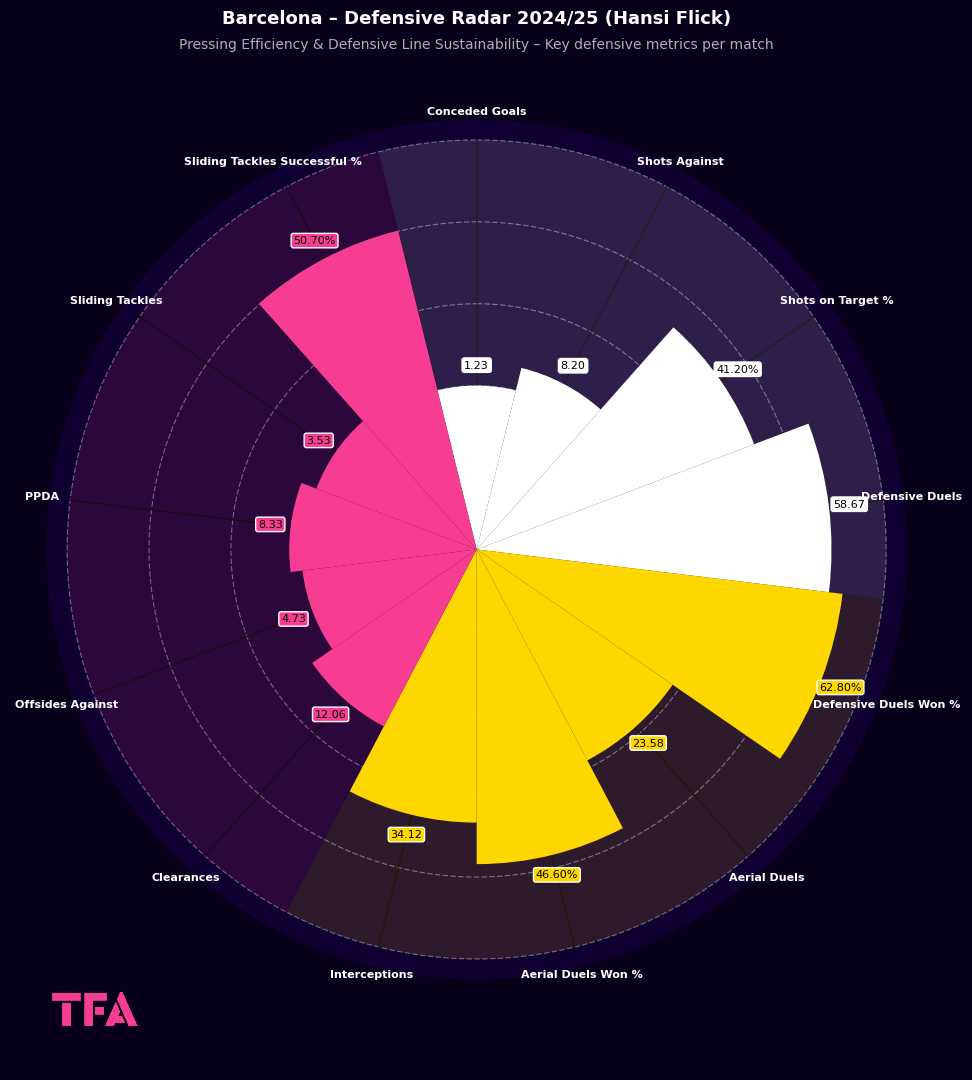

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Conceded Goals", "Shots Against", "Shots on Target %", "Defensive Duels",
        "Defensive Duels Won %", "Aerial Duels", "Aerial Duels Won %",
        "Interceptions", "Clearances", "Offsides Against", "PPDA",
        "Sliding Tackles", "Sliding Tackles Successful %"
    ],
    "Value": [
        1.23, 8.2, 41.20, 58.67,
        62.80, 23.58, 46.60,
        34.12, 12.06, 4.73, 8.33,
        3.53, 50.70
    ]
}

df = pd.DataFrame(data)

display_values = []
for m, v in zip(df["Metric"], df["Value"]):
    if "%" in m:
        display_values.append(f"{v:.2f}%")
    else:
        display_values.append(f"{v:.2f}")

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])

norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFFFFF"] * block_size +
    ["#FFD700"] * block_size +
    ["#F73D92"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        display_values[i],
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.07,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Barcelona – Defensive Radar 2024/25 (Hansi Flick)",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Pressing Efficiency & Defensive Line Sustainability – Key defensive metrics per match",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Possession Structure & Progression – Key build-up metrics per match

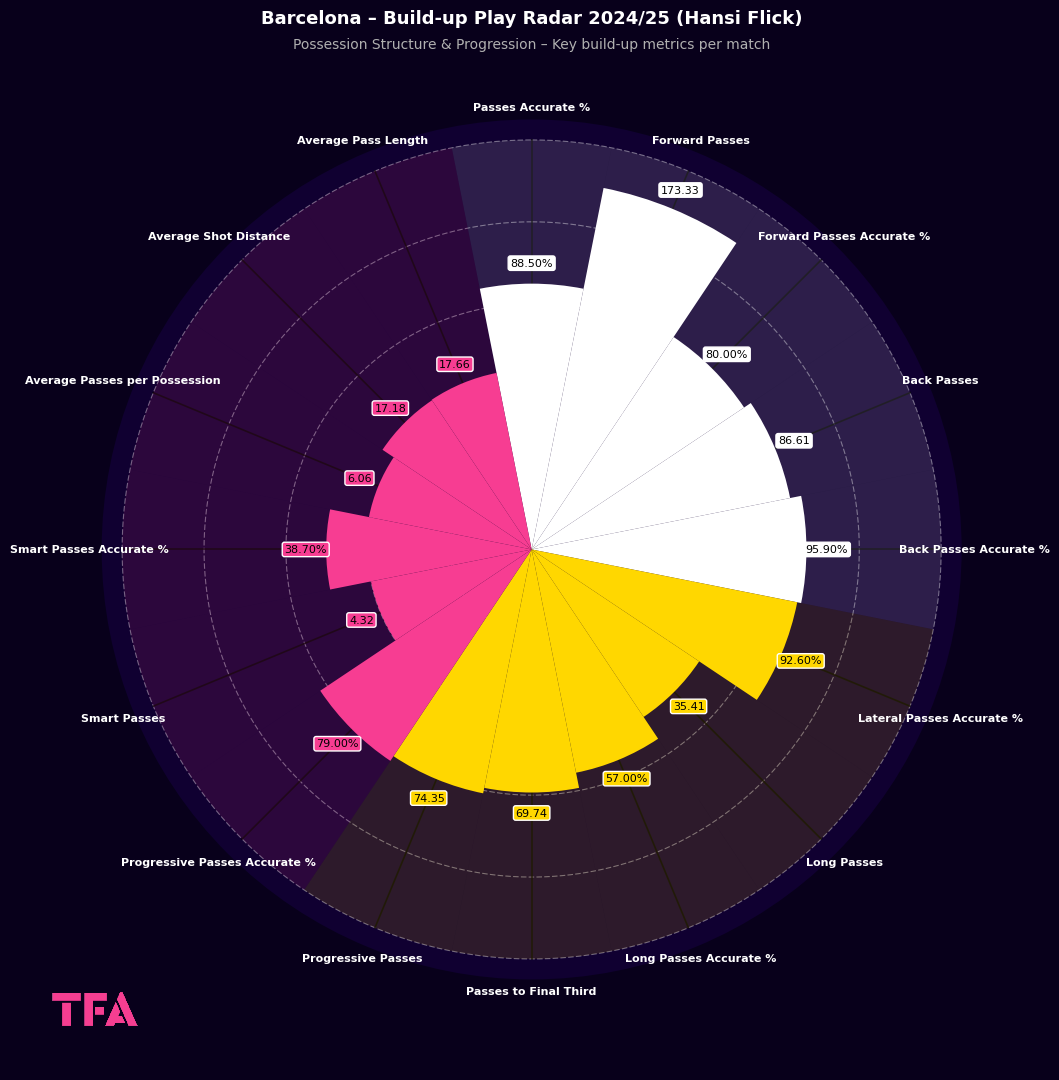

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Passes Accurate %", "Forward Passes", "Forward Passes Accurate %",
        "Back Passes", "Back Passes Accurate %", "Lateral Passes Accurate %",
        "Long Passes", "Long Passes Accurate %", "Passes to Final Third",
        "Progressive Passes", "Progressive Passes Accurate %", "Smart Passes", "Smart Passes Accurate %",
        "Average Passes per Possession", "Average Shot Distance", "Average Pass Length"
    ],
    "Value": [
        88.50, 173.33, 80.0,
        86.61, 95.90, 92.60,
        35.41, 57.0, 69.74,
        74.35, 79.0, 4.32, 38.70,
        6.06, 17.18, 17.66
    ]
}

df = pd.DataFrame(data)

display_values = []
for m, v in zip(df["Metric"], df["Value"]):
    if "%" in m:
        display_values.append(f"{v:.2f}%")
    else:
        display_values.append(f"{v:.2f}")

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])

norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFFFFF"] * block_size +
    ["#FFD700"] * block_size +
    ["#F73D92"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        display_values[i],
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.08,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Barcelona – Build-up Play Radar 2024/25 (Hansi Flick)",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Possession Structure & Progression – Key build-up metrics per match",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Barcelona – Direct & Fast Attacks 2024/25 Under Hansi Flick

C:\Users\muspo\AppData\Local\Temp\ipykernel_12124\420822748.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(df["Metric"], color="white", fontsize=10, weight="bold")
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


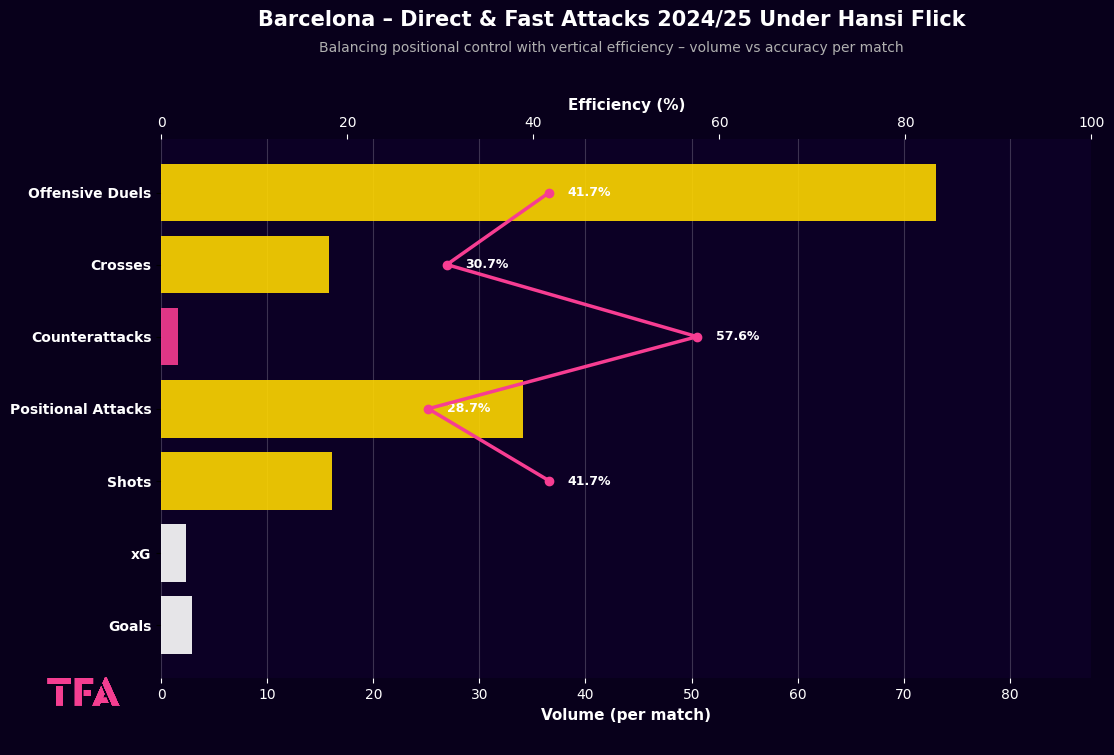

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Goals", "xG", "Shots", "Positional Attacks",
        "Counterattacks", "Crosses", "Offensive Duels"
    ],
    "Value": [2.85, 2.37, 16.12, 34.12, 1.58, 15.85, 73.09],
    "Accuracy": [None, None, 41.7, 28.7, 57.6, 30.7, 41.7]
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("#08001B")
ax1.set_facecolor("#0C0025")

bars = ax1.barh(
    df["Metric"], df["Value"],
    color=["#FFFFFF", "#FFFFFF", "#FFD700", "#FFD700", "#F73D92", "#FFD700", "#FFD700"],
    alpha=0.9, zorder=3
)

ax1.set_xlabel("Volume (per match)", color="white", fontsize=11, weight="bold")
ax1.tick_params(axis='x', colors='white')
ax1.set_xlim(0, max(df["Value"]) * 1.2)
ax1.set_yticklabels(df["Metric"], color="white", fontsize=10, weight="bold")

ax2 = ax1.twiny()
ax2.plot(
    df["Accuracy"], df.index, color="#F73D92", marker="o", linewidth=2.5, zorder=4
)
for i, acc in enumerate(df["Accuracy"]):
    if acc is not None:
        ax2.text(acc + 2, i, f"{acc:.1f}%", va="center", ha="left", color="white", fontsize=9, weight="bold")

ax2.set_xlabel("Efficiency (%)", color="white", fontsize=11, weight="bold")
ax2.tick_params(axis='x', colors='white')
ax2.set_xlim(0, 100)

plt.suptitle("Barcelona – Direct & Fast Attacks 2024/25 Under Hansi Flick",
             color='white', fontsize=15, weight='bold', y=1.065)

plt.text(0.5, 1.01,
         "Balancing positional control with vertical efficiency – volume vs accuracy per match",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

ax1.grid(axis='x', color="white", linestyle="-", alpha=0.2, zorder=0)
for spine in ax1.spines.values():
    spine.set_visible(False)
for spine in ax2.spines.values():
    spine.set_visible(False)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.17)
    ab = AnnotationBbox(imagebox, (0.069, 0.09), frameon=False, xycoords='figure fraction')
    fig.add_artist(ab)

plt.show()

Balancing lateral patience with vertical aggression – volume vs accuracy per match

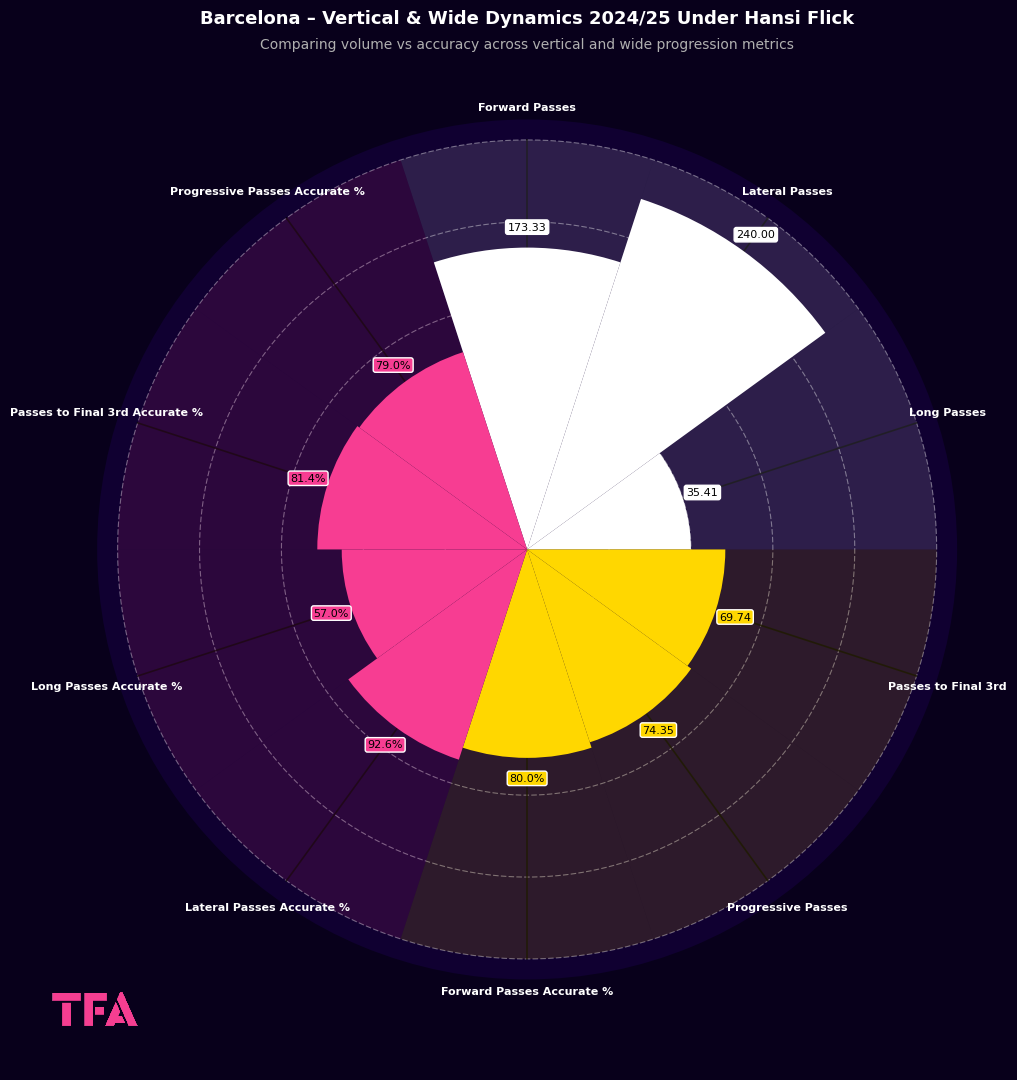

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Forward Passes", "Lateral Passes", "Long Passes",
        "Passes to Final 3rd", "Progressive Passes", 
        "Forward Passes Accurate %", "Lateral Passes Accurate %",
        "Long Passes Accurate %", "Passes to Final 3rd Accurate %",
        "Progressive Passes Accurate %"
    ],
    "Value": [
        173.33, 240, 35.41, 69.74, 74.35,
        80.0, 92.6, 57.0, 81.4, 79.0
    ]
}

df = pd.DataFrame(data)

display_values = []
for m, v in zip(df["Metric"], df["Value"]):
    if "%" in m:
        display_values.append(f"{v:.1f}%")
    else:
        display_values.append(f"{v:.2f}")

scaler = MinMaxScaler(feature_range=(0.4, 0.9))
df["Normalized"] = scaler.fit_transform(df[["Value"]])

norm_values = df["Normalized"].tolist()
norm_values += norm_values[:1]
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
angles += angles[:1]

block_size = len(df) // 3
custom_colors = (
    ["#FFFFFF"] * block_size +
    ["#FFD700"] * block_size +
    ["#F73D92"] * (len(df) - 2 * block_size)
)
colors = custom_colors + [custom_colors[0]]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#100031")
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_position([0.07, 0.1, 0.86, 0.86])

for r in [0.2, 0.4, 0.6, 0.8, 1.0]:
    ax.plot(np.linspace(0, 2 * np.pi, 500), [r]*500,
            color='white', linewidth=0.8, alpha=0.4, zorder=1,
            linestyle=(0, (5, 2)))

for angle in angles[:-1]:
    ax.plot([angle, angle], [0, 1.0],
            color='black', linewidth=1.2, alpha=0.8, zorder=2)

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=1.0,
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=0.12,
        linewidth=0,
        zorder=2
    )

for i in range(len(df)):
    ax.bar(
        x=angles[i],
        height=norm_values[i],
        width=2 * np.pi / len(df),
        bottom=0,
        color=colors[i],
        edgecolor=colors[i],
        alpha=1,
        linewidth=0,
        zorder=3
    )

for i in range(len(df)):
    ax.text(
        angles[i],
        norm_values[i] + 0.05,
        display_values[i],
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", facecolor=colors[i], edgecolor='white'),
        color='black',
        zorder=4
    )

for i in range(len(df)):
    angle = angles[i]
    ax.text(
        angle,
        1.08,
        df["Metric"][i],
        ha='center',
        va='center',
        fontsize=8,
        fontweight='bold',
        color='white',
        zorder=4
    )

ax.set_xticks([])
ax.set_yticks([])
ax.spines['polar'].set_visible(False)
ax.grid(False)

plt.suptitle("Barcelona – Vertical & Wide Dynamics 2024/25 Under Hansi Flick",
             color='white', fontsize=13, weight='bold', y=1.07)

plt.text(0.5, 1.035,
         "Comparing volume vs accuracy across vertical and wide progression metrics",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.2)
    ab = AnnotationBbox(imagebox, (0.15, 0.015), frameon=False, xycoords='figure fraction', box_alignment=(1, 0))
    fig.add_artist(ab)

plt.show()

Goals vs xG, shot efficiency, and attacking dynamics across multiple phases

C:\Users\muspo\AppData\Local\Temp\ipykernel_12124\1642376992.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df["Metric"], color="white", fontsize=10, weight="bold")


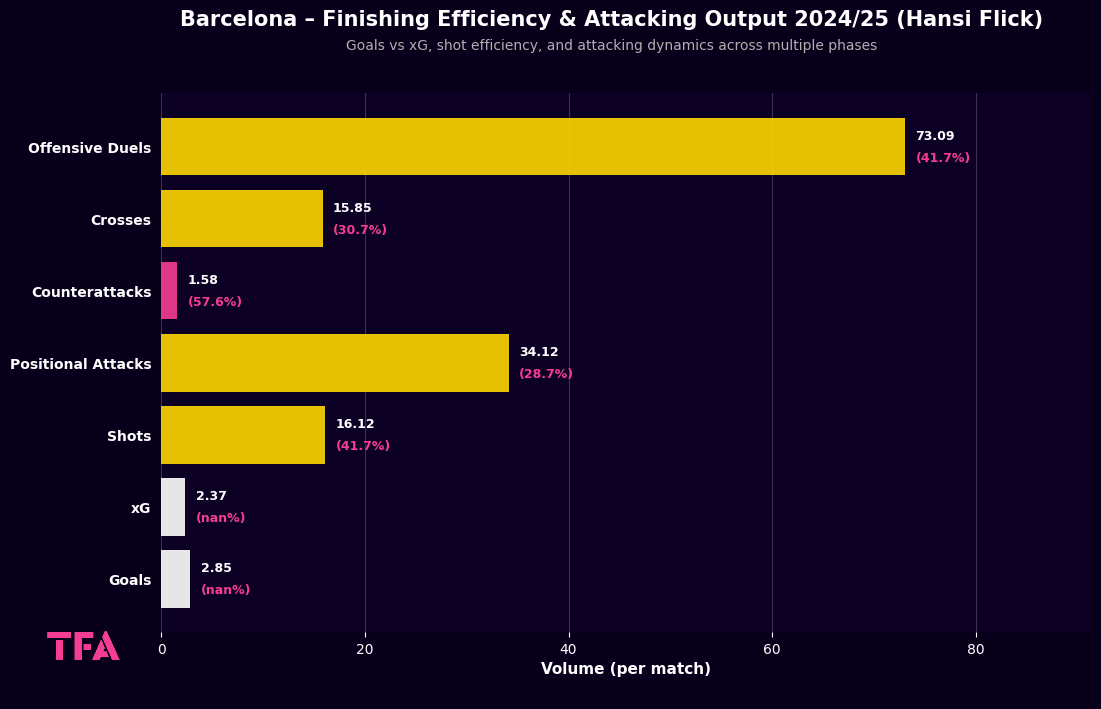

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

data = {
    "Metric": [
        "Goals", "xG", "Shots", "Positional Attacks",
        "Counterattacks", "Crosses", "Offensive Duels"
    ],
    "Value": [2.85, 2.37, 16.12, 34.12, 1.58, 15.85, 73.09],
    "Accuracy": [None, None, 41.7, 28.7, 57.6, 30.7, 41.7]
}

df = pd.DataFrame(data)

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor("#08001B")
ax.set_facecolor("#0C0025")

colors = ["#FFFFFF", "#FFFFFF", "#FFD700", "#FFD700", "#F73D92", "#FFD700", "#FFD700"]
bars = ax.barh(
    df["Metric"], df["Value"],
    color=colors, alpha=0.9, zorder=3
)

ax.set_xlabel("Volume (per match)", color="white", fontsize=11, weight="bold")
ax.tick_params(axis='x', colors='white')
ax.set_xlim(0, max(df["Value"]) * 1.25)
ax.set_yticklabels(df["Metric"], color="white", fontsize=10, weight="bold")

for i, (bar, value, acc) in enumerate(zip(bars, df["Value"], df["Accuracy"])):
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2 + 0.15,
            f"{value:.2f}", va="center", ha="left",
            color="white", fontsize=9, weight="bold")
    if acc is not None:
        ax.text(width + 1, bar.get_y() + bar.get_height()/2 - 0.15,
                f"({acc:.1f}%)", va="center", ha="left",
                color="#F73D92", fontsize=9, weight="bold")

plt.suptitle("Barcelona – Finishing Efficiency & Attacking Output 2024/25 (Hansi Flick)",
             color="white", fontsize=15, weight="bold", y=1.00)

plt.text(0.5, 0.948,
         "Goals vs xG, shot efficiency, and attacking dynamics across multiple phases",
         ha='center', va='center',
         transform=fig.transFigure,
         color='#B0B0B0', fontsize=10)

ax.grid(axis='x', color="white", linestyle="-", alpha=0.2, zorder=0)
for spine in ax.spines.values():
    spine.set_visible(False)

tfa_logo_path = "D:/Work/Data Analysis TFA/06 How Ancelotti Could Reshape Brazil/logos/TFA.png"
if os.path.exists(tfa_logo_path):
    tfa_img = Image.open(tfa_logo_path)
    imagebox = OffsetImage(tfa_img, zoom=0.17)
    ab = AnnotationBbox(imagebox, (0.069, 0.09), frameon=False, xycoords='figure fraction')
    fig.add_artist(ab)

plt.show()